In [15]:
import zipfile
zip_path = "/content/MPA-MLF_DATA_NEW.zip"
extract_path = "/content/MPA_DATA"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: /content/MPA_DATA


In [16]:
import os
import numpy as np
import pandas as pd

def load_data():
    train_path = "/content/MPA_DATA/Train"
    test_path = "/content/MPA_DATA/Test"
    label_path = "/content/MPA_DATA/label_train.csv"

    labels_df = pd.read_csv(label_path)
    labels_df.columns = ['ID', 'target']

    X_train, y_train = [], []
    for _, row in labels_df.iterrows():
        filename = str(row['ID']) + ".npy"
        filepath = os.path.join(train_path, filename)
        X_train.append(np.load(filepath))
        y_train.append(row['target'])

    X_test = []
    test_filenames = sorted(os.listdir(test_path))
    for fname in test_filenames:
        X_test.append(np.load(os.path.join(test_path, fname)))

    return np.array(X_train), np.array(y_train), np.array(X_test), test_filenames

X_train, y_train, X_test, test_filenames = load_data()


In [17]:
X_train, y_train, X_test, test_filenames = load_data()
print("Train shape:", X_train.shape)
print("Labels shape:", y_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1491, 72, 48)
Labels shape: (1491,)
Test shape: (120, 72, 48)


In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 72, 48, 1)
X_test = X_test.reshape(-1, 72, 48, 1)


y_train_cat = to_categorical(y_train, num_classes=3)


X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_train, y_train_cat, test_size=0.2, shuffle=True
)


In [19]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Input(shape=(72, 48, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(3, activation='softmax')  # 3 classes, activation par défaut
])


In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 70, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        30,723 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,539 (193.51 KB)

 Trainable params: 49,539 (193.51 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    X_train_final, y_train_final,
    validation_data=(X_val_final, y_val_final),
    epochs=10  )


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.7501 - loss: 0.7519 - val_accuracy: 0.8161 - val_loss: 0.5125
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.8127 - loss: 0.4990 - val_accuracy: 0.8896 - val_loss: 0.3815
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.8852 - loss: 0.3483 - val_accuracy: 0.8896 - val_loss: 0.3030
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.8971 - loss: 0.2531 - val_accuracy: 0.8896 - val_loss: 0.2678
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9233 - loss: 0.2010 - val_accuracy: 0.9532 - val_loss: 0.1587
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9720 - loss: 0.1179 - val_accuracy: 0.9699 - val_loss: 0.1147
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9764 - loss: 0.0828 - val_accuracy: 0.9732 - val_loss: 0.0978
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9921 - loss: 0.0504 - val_accuracy: 0.

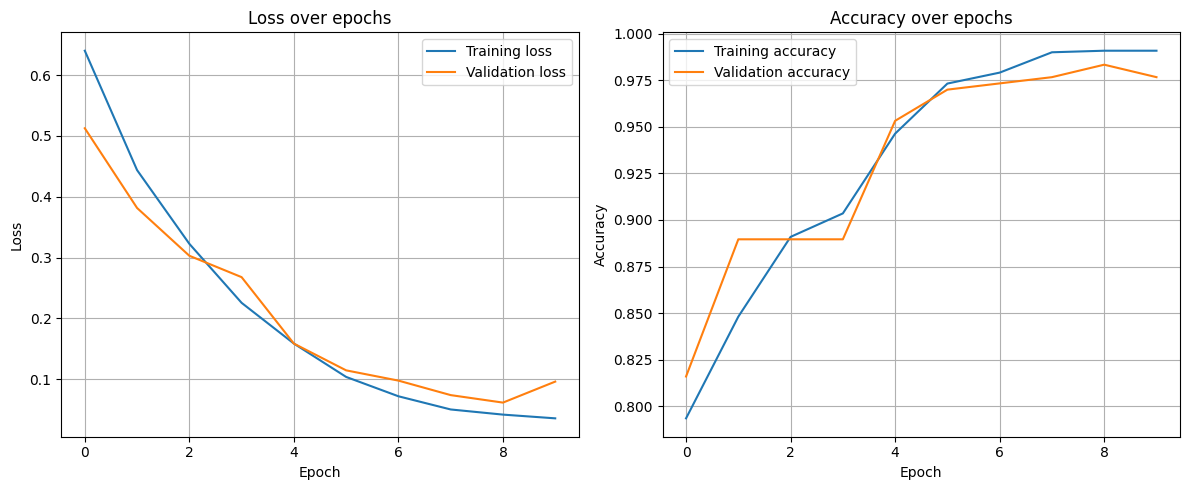

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


y_pred = model.predict(X_val_final)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val_final, axis=1)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


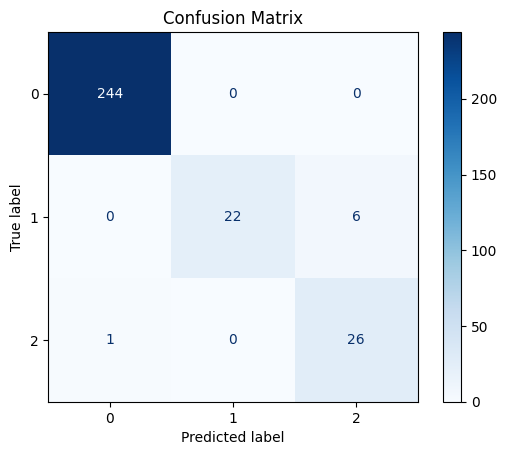

In [24]:

cm = confusion_matrix(y_true, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [29]:
y_test_pred = model.predict(X_test)
y_test_classes = np.argmax(y_test_pred, axis=1)

ids = [int(f.replace('.npy', '')) for f in test_filenames]

submission = pd.DataFrame({
    "ID": ids,
    "target": y_test_classes
}).sort_values("ID")

submission.to_csv("submission1.csv", index=False)
print("CSV saved")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
CSV saved
